# Student grades prediction Project

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset and showing first 5 rows

In [3]:
df_grades = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv")
df_grades.head()

Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102 EE-119  \
0  CS-97001     B-     D+     C-         C     C-     D+      D     C-     B-   
1  CS-97002      A      D     D+         D     B-      C      D      A     D+   
2  CS-97003      A      B      A        B-     B+      A     B-     B+     A-   
3  CS-97004      D     C+     D+         D      D     A-     D+     C-      D   
4  CS-97005     A-     A-     A-        B+      A      A     A-     B+      A   

   ... CS-312 CS-317 CS-403 CS-421 CS-406 CS-414 CS-419 CS-423 CS-412   CGPA  
0  ...     C-     C-     C-     C-     A-      A     C-      B     A-  2.205  
1  ...     D+      D      C      D     A-     B-      C      C      B  2.008  
2  ...      B      B      A      C      A      A      A     A-      A  3.608  
3  ...     D+      C     D+     C-     B-      B     C+     C+     C+  1.906  
4  ...     B-     B+     B+     B-     A-      A     A-     A-      A  3.448  

[5 rows x 43 columns]

### Exploratory Data Analysis(EDA)

In [4]:
#checking the dimension of the dataset
df_grades.shape

(571, 43)

This database contains 571 rows and 43 columns.

In [5]:
#getting the information from the dataset
df_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [6]:
#Checking the types of columns
df_grades.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

We can see there are 2 different types of data (object and float) present in the dataset.

In [7]:
# checking for the missing values
df_grades.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

There are missing values present in the dataset

In [10]:
#Displaying column names
df_grades.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [17]:
# Checking the Unique Values of Each Column
df_grades.apply(pd.Series.unique)

PH-121         [B-, A, D, A-, B+, B, C+, C, C-, D+, WU, A+, F]
HS-101             [D+, D, B, C+, A-, B-, C-, B+, C, A, A+, F]
CY-105       [C-, D+, A, A-, B, C+, B+, B-, C, D, nan, WU, ...
HS-105/12    [C, D, B-, B+, D+, B, C-, C+, A-, A, nan, WU, ...
MT-111       [C-, B-, B+, D, A, C+, A-, C, B, D+, nan, A+, ...
CS-105                [D+, C, A, A-, B, B-, B+, C+, C-, A+, D]
CS-106       [D, B-, D+, A-, C+, A, C-, C, B, B+, nan, A+, ...
EL-102       [C-, A, B+, B, A-, B-, C, C+, D+, D, nan, A+, ...
EE-119       [B-, D+, A-, D, A, B+, B, C-, C+, C, WU, nan, A+]
ME-107       [C-, D, A-, C+, B+, A, D+, C, B, B-, WU, nan, ...
CS-107       [C-, B+, B-, D, C, A-, C+, D+, B, A, nan, A+, ...
HS-205/20    [B+, C+, A-, B, A, B-, nan, D, WU, A+, C, D+, ...
MT-222       [D, B-, A, D+, C, B+, A-, B, C+, nan, C-, WU, ...
EE-222       [A-, C-, A, B-, B+, C+, D+, B, nan, C, W, A+, ...
MT-224       [B-, D+, A, D, A-, C-, C, B+, C+, B, nan, A+, ...
CS-210       [C+, D+, A, C, A-, B+, B-, B, nan, D, A+, 

In [12]:
#Dropping  the unrequired columns
df_grades.drop(['Seat No.'],axis='columns',inplace=True)

In [13]:
df_grades.shape

(571, 42)

### Encoding Grade values

In [18]:
#From 1 - 15, where 1 represents least weightage and 15 represents the highest weightage of a gradepoint

x = {'A+': 15, 'A': 14, 'A-': 13, 'B+': 12, 'B': 11, 'B-': 10,
    'C+': 9, 'C': 8, 'C-': 7, 'D+': 6, 'D': 5, 'F': 4,
     'I' : 3, 'W': 2, 'WU': 1}
df_grades= df_grades.replace(x)

In [19]:
df_grades.head(10)

PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  EE-119  \
0      10       6     7.0        8.0     7.0       6     5.0     7.0    10.0   
1      14       5     6.0        5.0    10.0       8     5.0    14.0     6.0   
2      14      11    14.0       10.0    12.0      14    10.0    12.0    13.0   
3       5       9     6.0        5.0     5.0      13     6.0     7.0     5.0   
4      13      13    13.0       12.0    14.0      14    13.0    12.0    14.0   
5      14      10    11.0        6.0     9.0      13     9.0    11.0    12.0   
6      10       7    13.0        5.0    13.0      11    14.0    12.0    13.0   
7      12      12     9.0        8.0     8.0      13     7.0    13.0    11.0   
8      13       8    13.0        6.0    11.0      13    13.0    13.0    12.0   
9      14      11     9.0       11.0    11.0      13     8.0    10.0    13.0   

   ME-107  ...  CS-312  CS-317  CS-403  CS-421  CS-406  CS-414  CS-419  \
0     7.0  ...     7.0     7.0     7.0     7.0    13.0    14.0     7.0   
1     5.0  ...     6.0     5.0     8.0     5.0    13.0    10.0     8.0   
2    13.0  ...    11.0    11.0    14.0     8.0    14.0    14.0    14.0   
3     9.0  ...     6.0     8.0     6.0     7.0    10.0    11.0     9.0   
4    13.0  ...    10.0    12.0    12.0    10.0    13.0    14.0    13.0   
5    12.0  ...     8.0    10.0     9.0     9.0    13.0    13.0    12.0   
6    12.0  ...    10.0     8.0    12.0    10.0    14.0    13.0    12.0   
7    13.0  ...     6.0    12.0    12.0     8.0    14.0    12.0    13.0   
8    13.0  ...    12.0    11.0    10.0     9.0    14.0    13.0    12.0   
9    14.0  ...     9.0    10.0    12.0    10.0    14.0    14.0    13.0   

   CS-423  CS-412   CGPA  
0    11.0    13.0  2.205  
1     8.0    11.0  2.008  
2    13.0    14.0  3.608  
3     9.0     9.0  1.906  
4    13.0    14.0  3.448  
5    10.0    11.0  3.026  
6    12.0    14.0  2.957  
7    13.0    13.0  3.043  
8    13.0    14.0  3.358  
9    11.0    14.0  3.247  

[10 rows x 42 columns]

### Statistical analysis of the dataset

In [20]:
#summary of the dataset
df_grades.describe()

PH-121      HS-101      CY-105   HS-105/12      MT-111      CS-105  \
count  571.000000  571.000000  570.000000  570.000000  569.000000  571.000000   
mean    11.021016    9.809107   11.798246   10.635088   10.959578   11.994746   
std      2.968770    2.724223    2.845710    3.126534    2.877814    2.500872   
min      1.000000    4.000000    1.000000    1.000000    1.000000    5.000000   
25%      9.000000    8.000000   10.250000    8.000000    9.000000   11.000000   
50%     12.000000   10.000000   13.000000   11.000000   12.000000   13.000000   
75%     13.000000   12.000000   14.000000   13.000000   13.000000   14.000000   
max     15.000000   15.000000   15.000000   15.000000   15.000000   15.000000   

           CS-106      EL-102      EE-119      ME-107  ...      CS-312  \
count  569.000000  569.000000  569.000000  569.000000  ...  561.000000   
mean    10.829525   10.912127   11.012302   10.059754  ...   10.930481   
std      2.575092    2.979864    2.493977    3.070179  ...    3.310235   
min      1.000000    1.000000    1.000000    1.000000  ...    1.000000   
25%     10.000000    9.000000    9.000000    7.000000  ...    8.000000   
50%     11.000000   12.000000   12.000000   10.000000  ...   12.000000   
75%     13.000000   13.000000   13.000000   13.000000  ...   14.000000   
max     15.000000   15.000000   15.000000   15.000000  ...   15.000000   

           CS-317      CS-403      CS-421      CS-406      CS-414      CS-419  \
count  559.000000  559.000000  559.000000  486.000000  558.000000  558.000000   
mean    10.078712   11.350626    9.486583   11.726337   12.281362   11.017921   
std      2.601535    2.621006    2.597783    2.458146    2.263926    2.208934   
min      4.000000    5.000000    2.000000    1.000000    2.000000    4.000000   
25%      8.000000   10.000000    8.000000   11.000000   11.000000   10.000000   
50%     10.000000   12.000000   10.000000   13.000000   13.000000   11.000000   
75%     12.000000   14.000000   11.000000   13.000000   14.000000   13.000000   
max     15.000000   15.000000   15.000000   15.000000   15.000000   15.000000   

           CS-423      CS-412        CGPA  
count  557.000000  492.000000  571.000000  
mean    10.874327   11.674797    2.954888  
std      2.612643    2.289606    0.620552  
min      4.000000    2.000000    0.800000  
25%      9.000000   11.000000    2.538000  
50%     11.000000   12.000000    3.029000  
75%     13.000000   13.000000    3.451000  
max     15.000000   15.000000    3.985000  

[8 rows x 42 columns]

 From above we can see the count is not same for all the columns as there are missing values present in them.

In [21]:
#Filling the NaN values
for col in df_grades.columns:
    df_grades[f'{col}'].fillna(df_grades[f'{col}'].mode()[0], inplace = True)

In [22]:
df_grades.describe()

PH-121      HS-101      CY-105   HS-105/12      MT-111      CS-105  \
count  571.000000  571.000000  571.000000  571.000000  571.000000  571.000000   
mean    11.021016    9.809107   11.802102   10.640981   10.966725   11.994746   
std      2.968770    2.724223    2.844705    3.126963    2.875293    2.500872   
min      1.000000    4.000000    1.000000    1.000000    1.000000    5.000000   
25%      9.000000    8.000000   10.500000    8.000000    9.000000   11.000000   
50%     12.000000   10.000000   13.000000   11.000000   12.000000   13.000000   
75%     13.000000   12.000000   14.000000   13.000000   13.000000   14.000000   
max     15.000000   15.000000   15.000000   15.000000   15.000000   15.000000   

           CS-106      EL-102      EE-119      ME-107  ...      CS-312  \
count  571.000000  571.000000  571.000000  571.000000  ...  571.000000   
mean    10.837128   10.919440   11.019264   10.070053  ...   11.001751   
std      2.573772    2.977192    2.492370    3.069716  ...    3.324286   
min      1.000000    1.000000    1.000000    1.000000  ...    1.000000   
25%     10.000000    9.000000    9.000000    7.000000  ...    8.000000   
50%     11.000000   12.000000   12.000000   10.000000  ...   12.000000   
75%     13.000000   13.000000   13.000000   13.000000  ...   14.000000   
max     15.000000   15.000000   15.000000   15.000000  ...   15.000000   

           CS-317      CS-403      CS-421      CS-406     CS-414      CS-419  \
count  571.000000  571.000000  571.000000  571.000000  571.00000  571.000000   
mean    10.077058   11.406305    9.518389   11.915937   12.32049   11.063047   
std      2.574030    2.621014    2.579459    2.312424    2.25262    2.203558   
min      4.000000    5.000000    2.000000    1.000000    2.00000    4.000000   
25%      8.000000   10.000000    8.000000   11.000000   11.50000   10.000000   
50%     10.000000   12.000000   10.000000   13.000000   13.00000   11.000000   
75%     12.000000   14.000000   11.000000   13.000000   14.00000   13.000000   
max     15.000000   15.000000   15.000000   15.000000   15.00000   15.000000   

           CS-423      CS-412        CGPA  
count  571.000000  571.000000  571.000000  
mean    10.926445   11.858144    2.954888  
std      2.601252    2.173811    0.620552  
min      4.000000    2.000000    0.800000  
25%      9.000000   11.000000    2.538000  
50%     12.000000   13.000000    3.029000  
75%     13.000000   13.000000    3.451000  
max     15.000000   15.000000    3.985000  

[8 rows x 42 columns]

### Separating the features and target

In [27]:
x = df_grades.drop(['CGPA'],axis=1)
y = df_grades['CGPA']

### Visualization

#### Univariate Analysis

PH-121


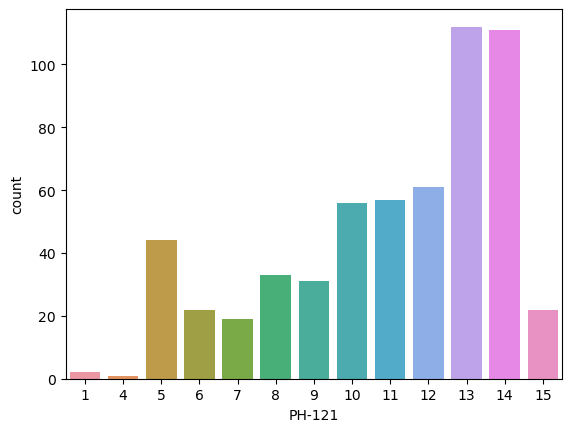

HS-101


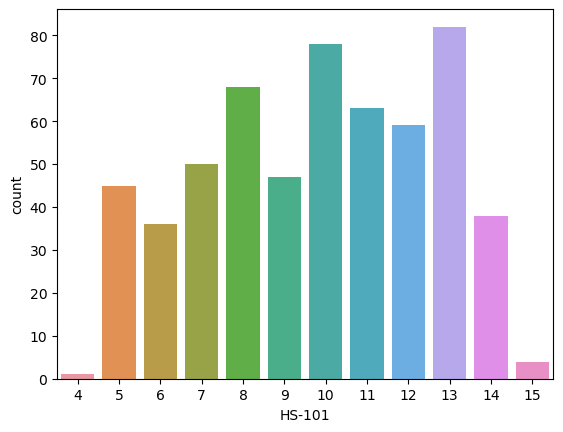

CY-105


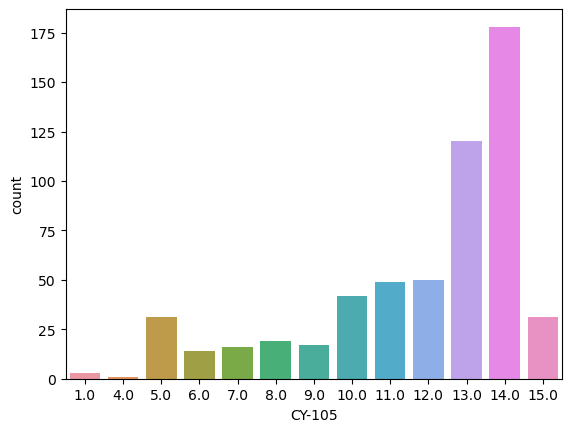

HS-105/12


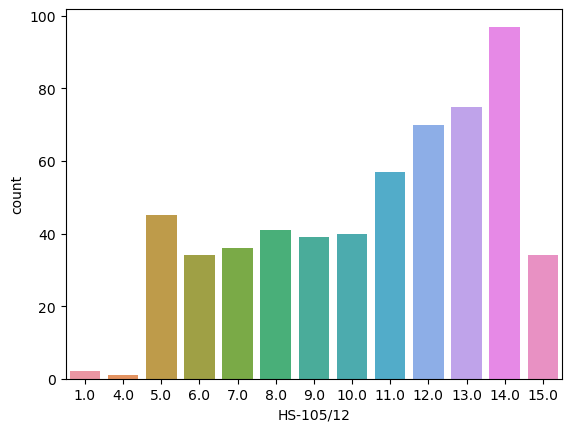

MT-111


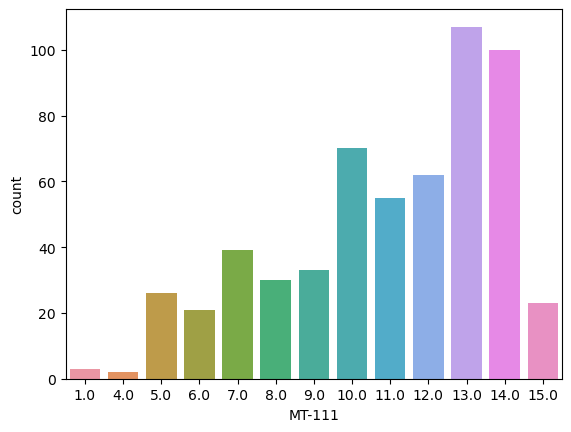

CS-105


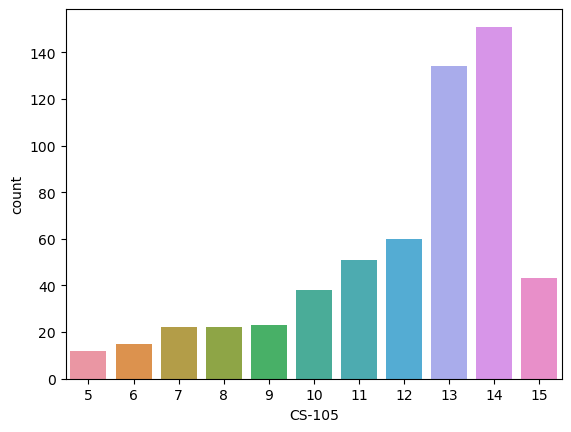

CS-106


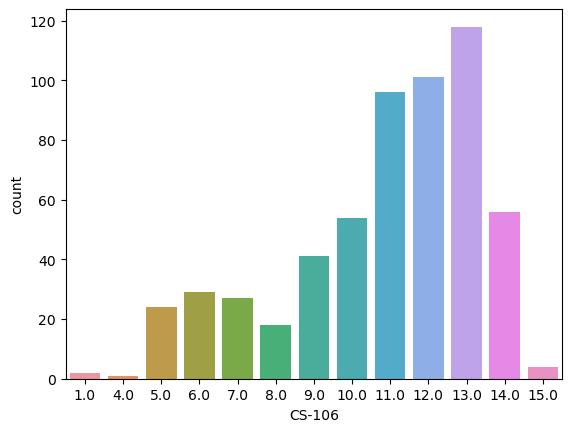

EL-102


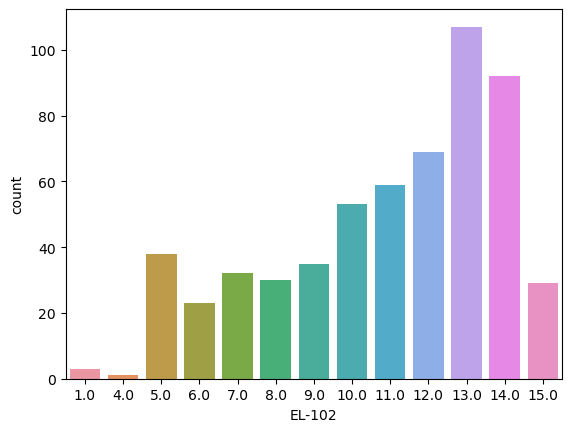

EE-119


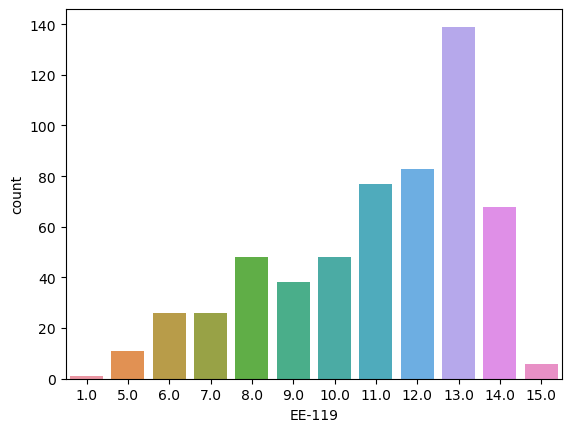

ME-107


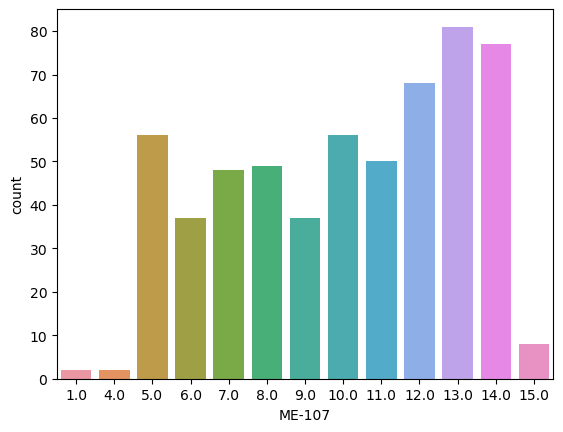

CS-107


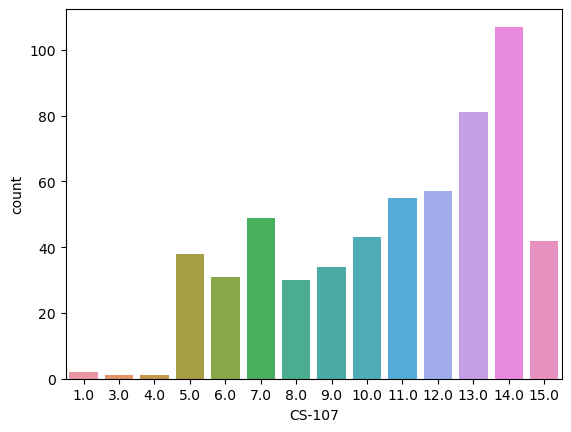

HS-205/20


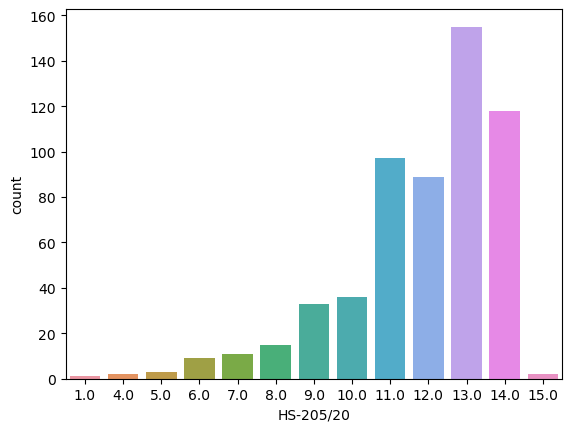

MT-222


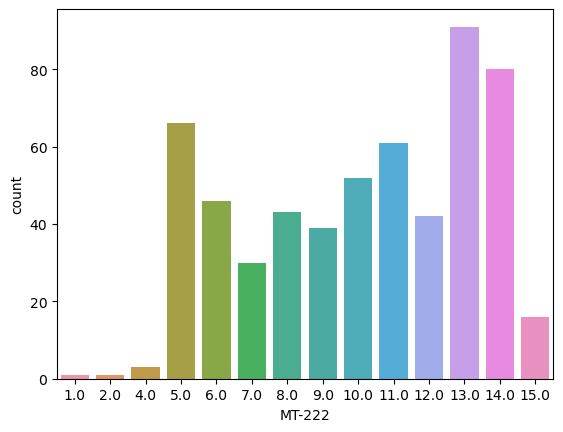

EE-222


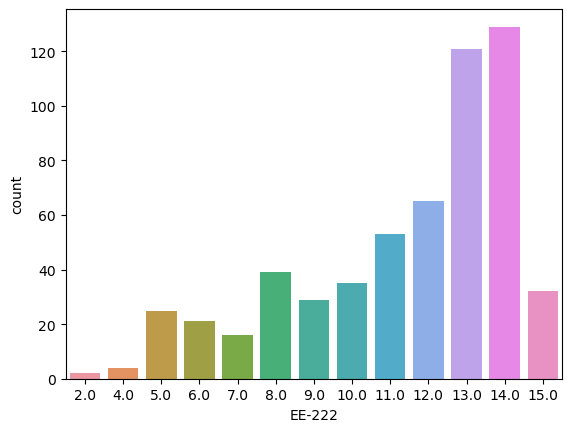

MT-224


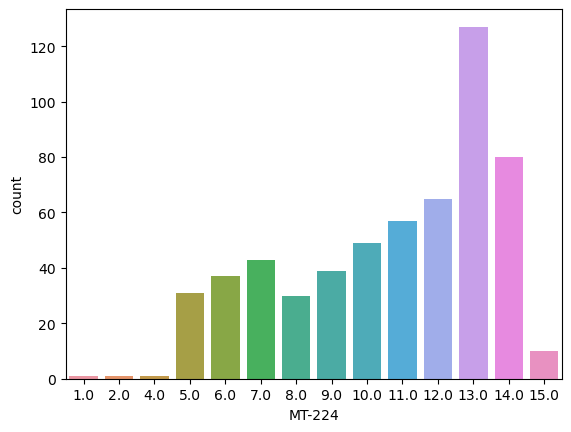

CS-210


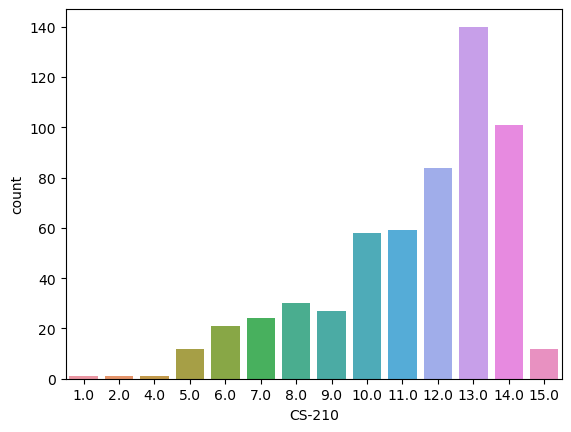

CS-211


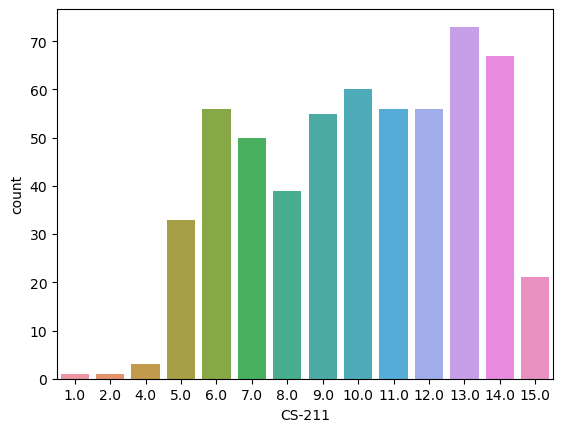

CS-203


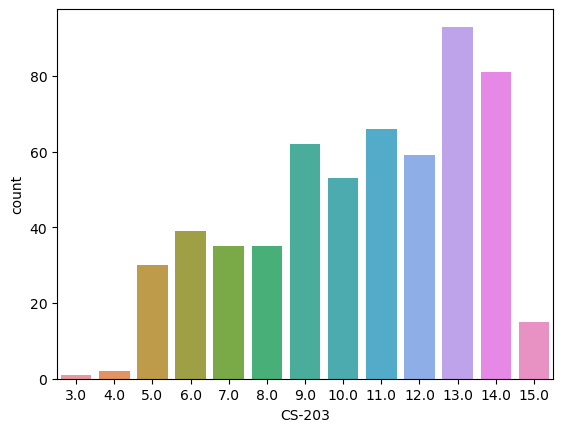

CS-214


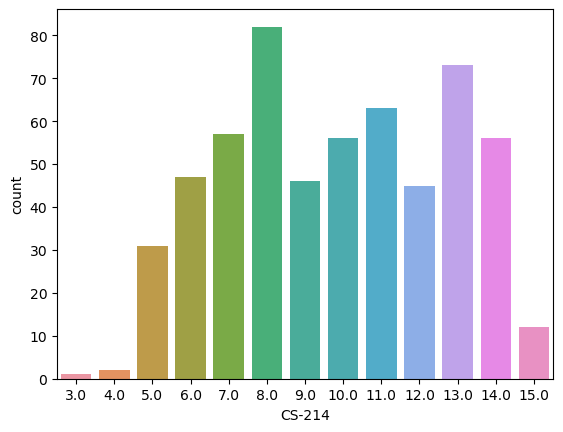

EE-217


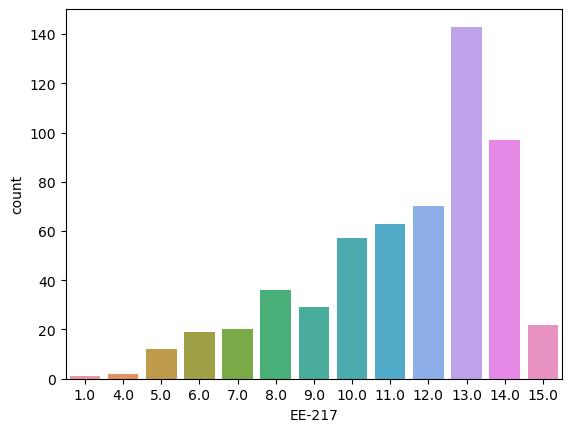

CS-212


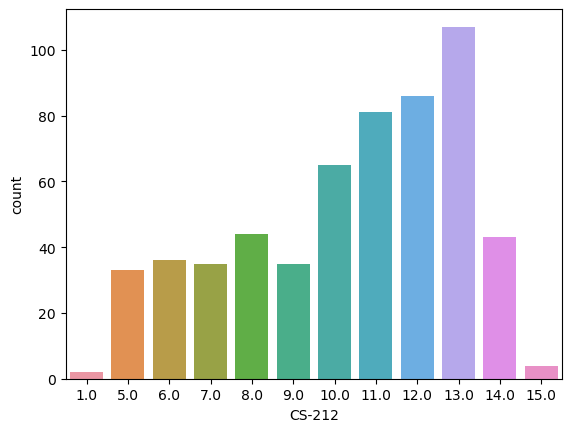

CS-215


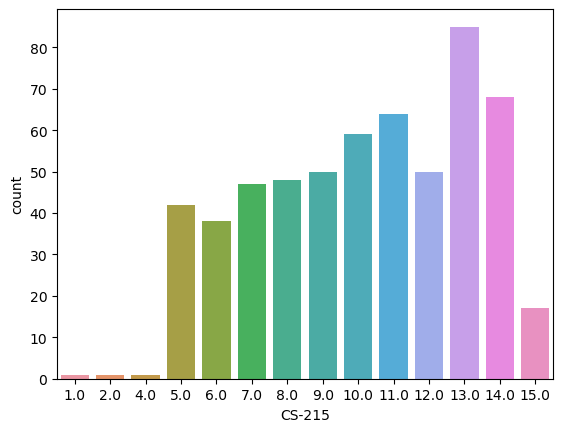

MT-331


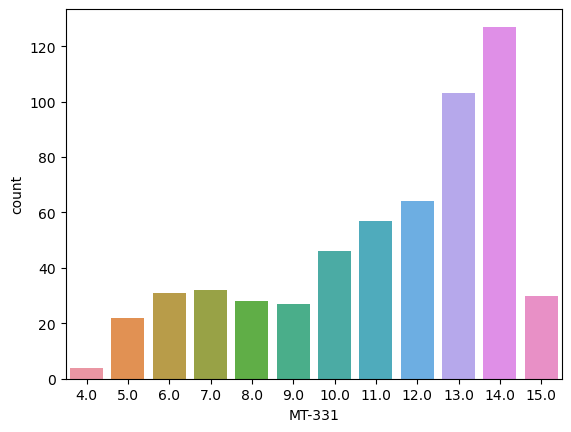

EF-303


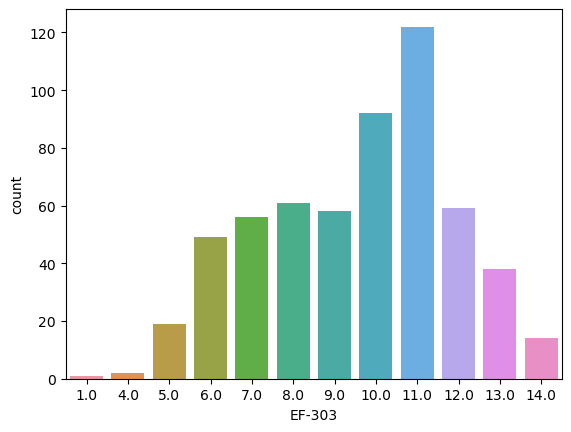

HS-304


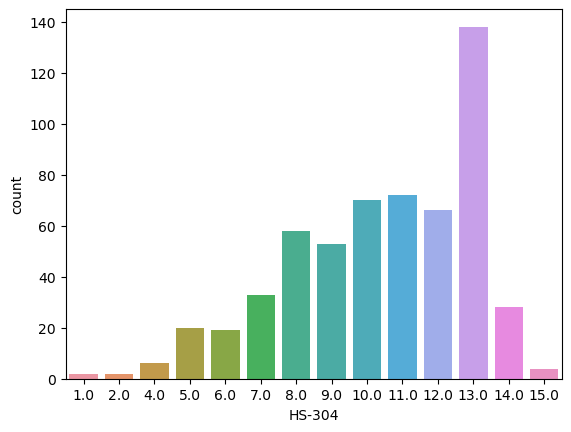

CS-301


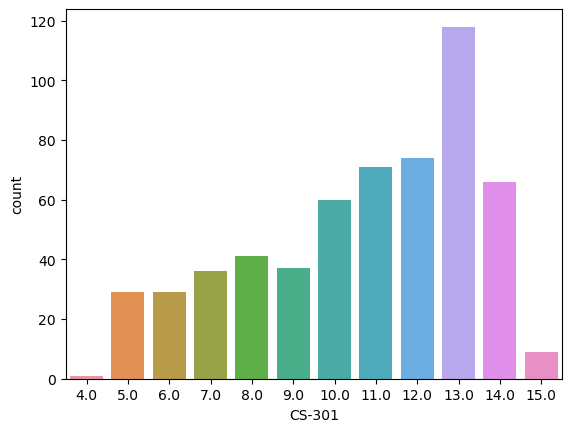

CS-302


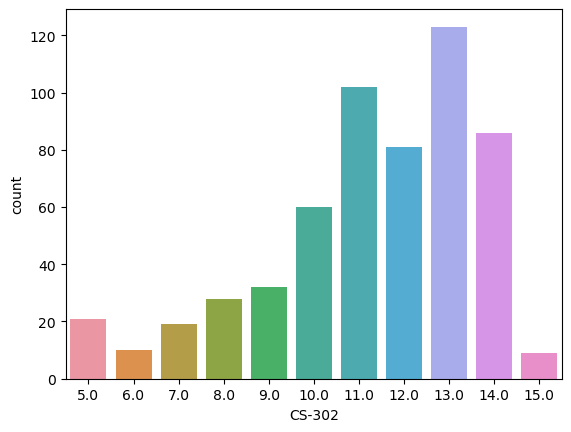

TC-383


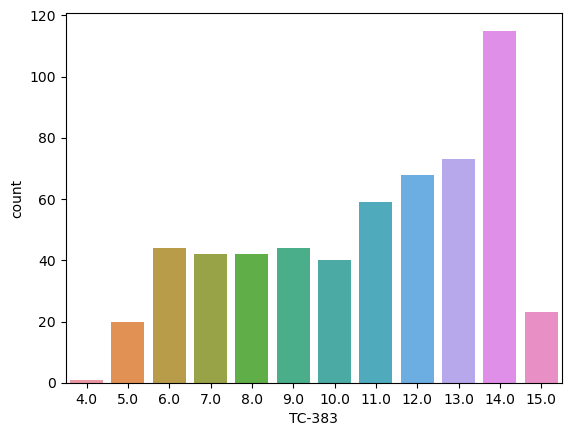

MT-442


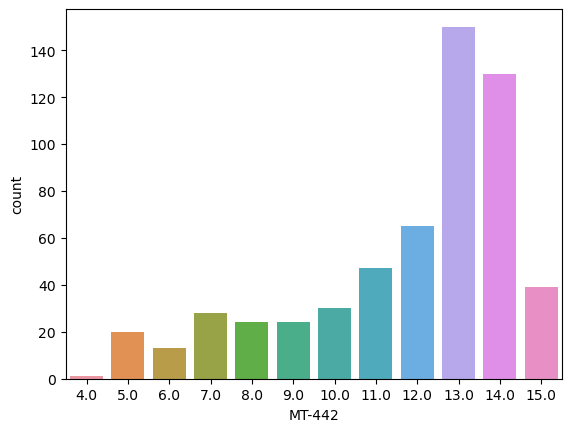

EL-332


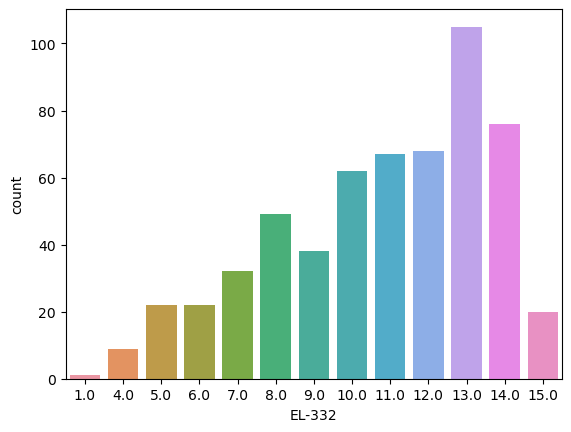

CS-318


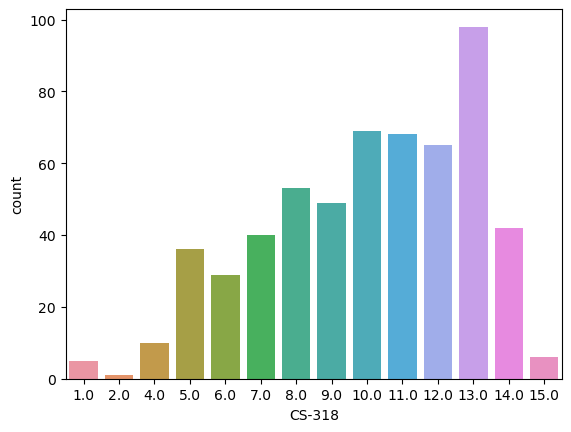

CS-306


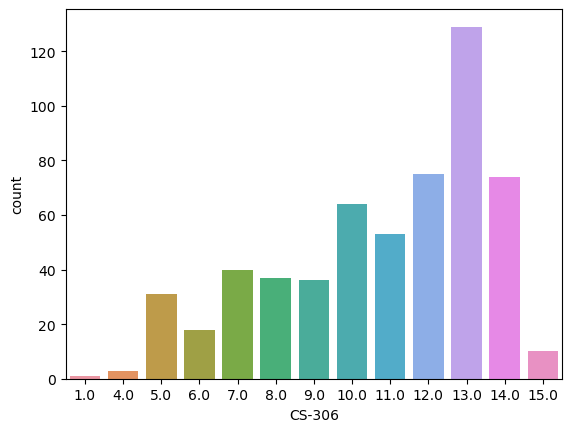

CS-312


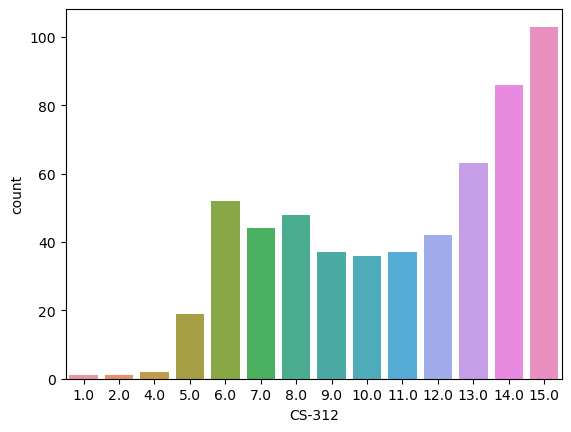

CS-317


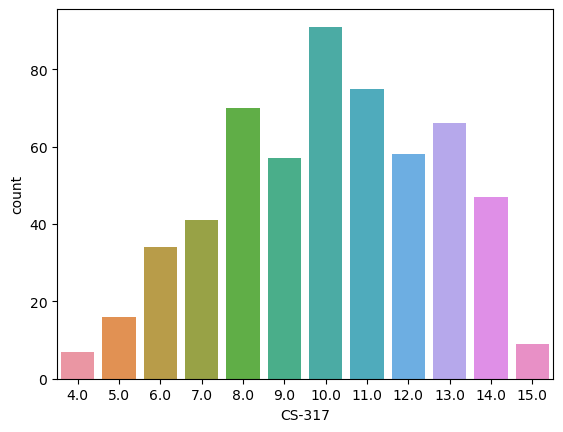

CS-403


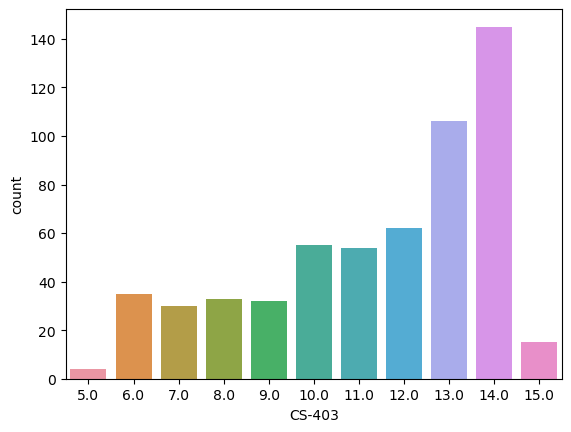

CS-421


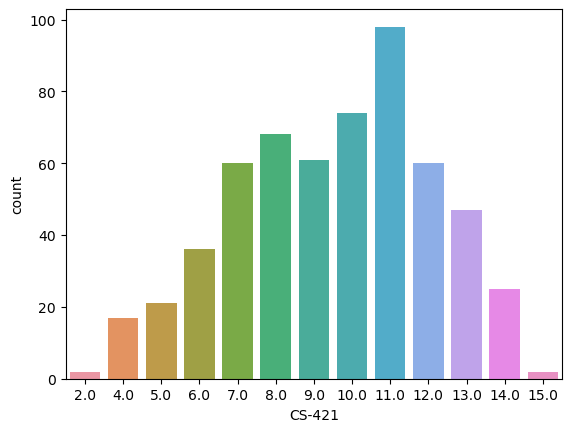

CS-406


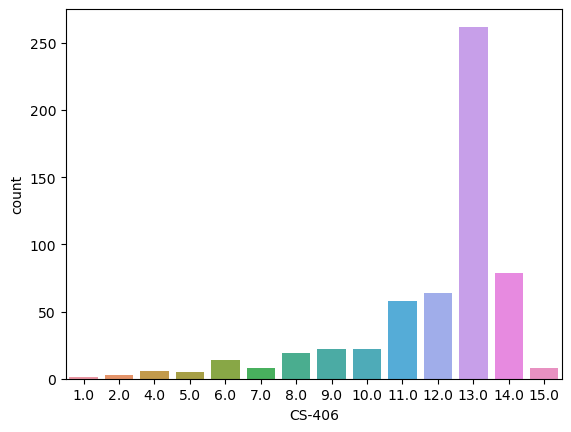

CS-414


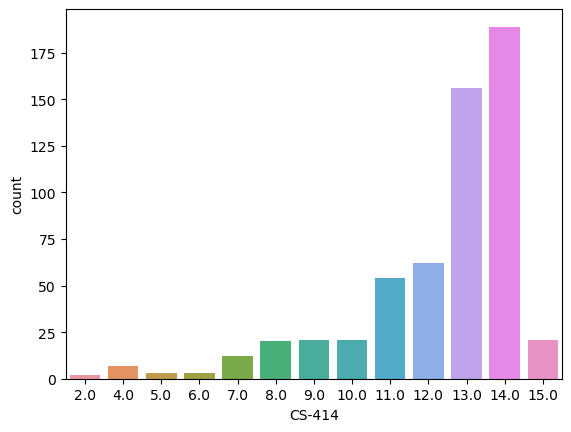

CS-419


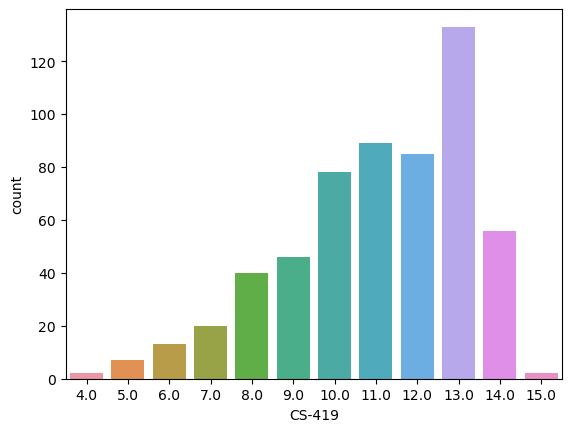

CS-423


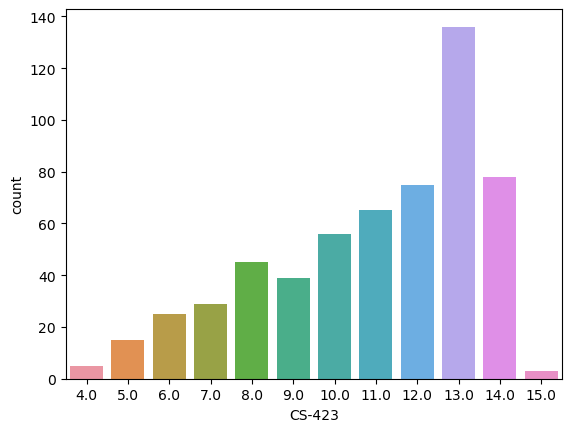

CS-412


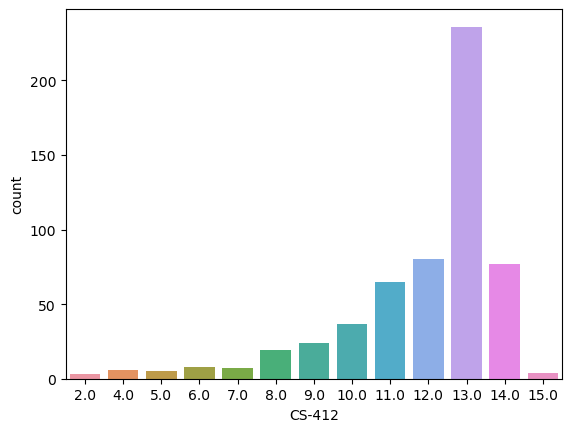

In [28]:
for i in x.columns:
    print(str(i))
    sns.countplot(df_grades[i])
    plt.show()

From above we can observe in every year most of the students scoring in the grade range of"7-14'.

#### Bivariate Analysis

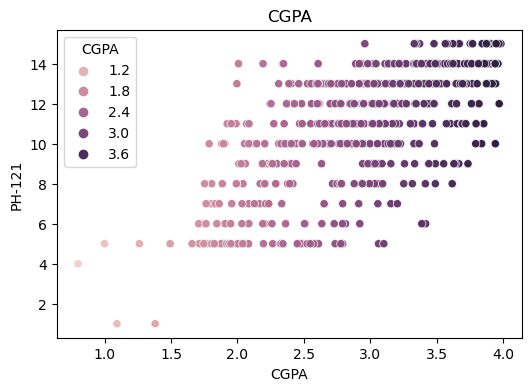

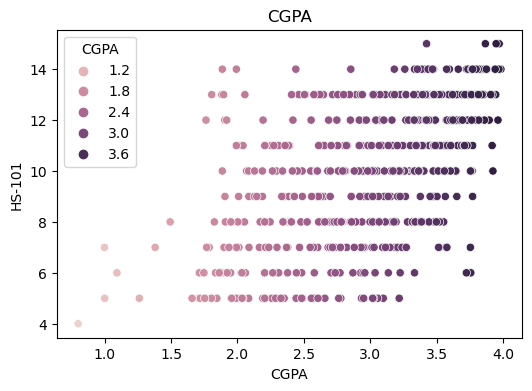

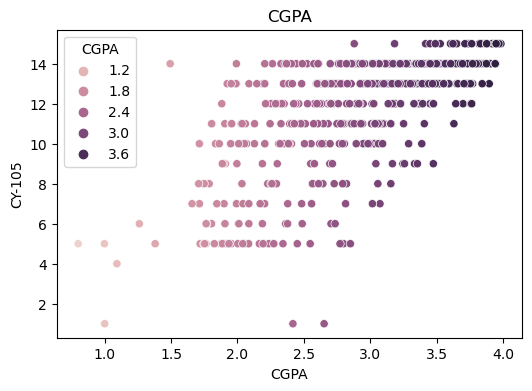

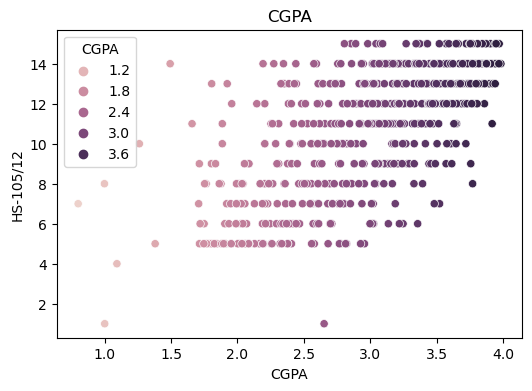

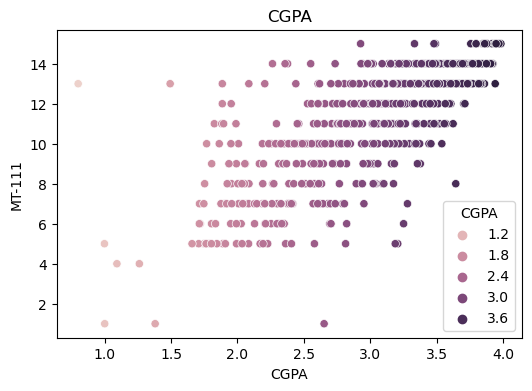

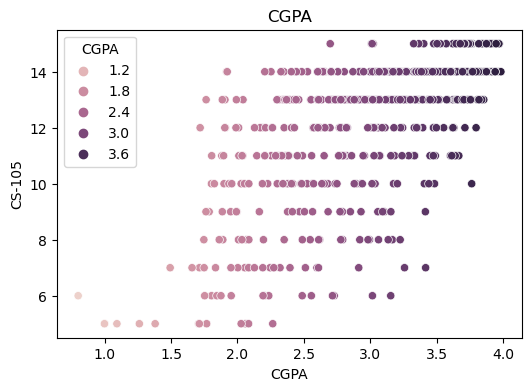

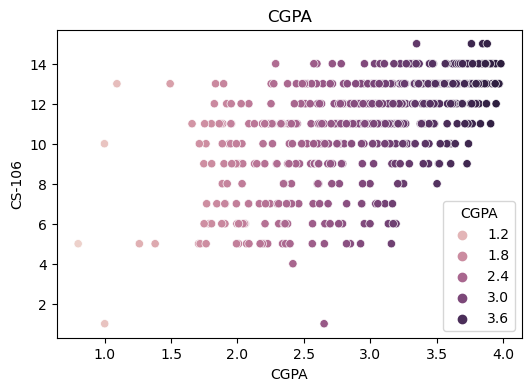

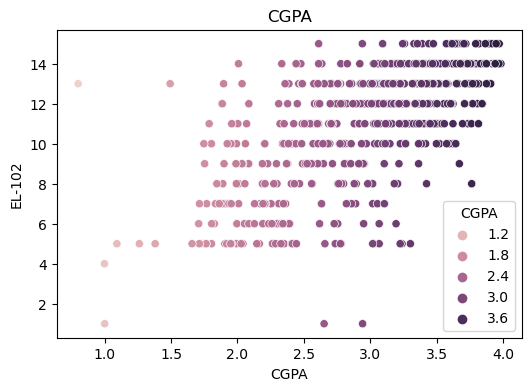

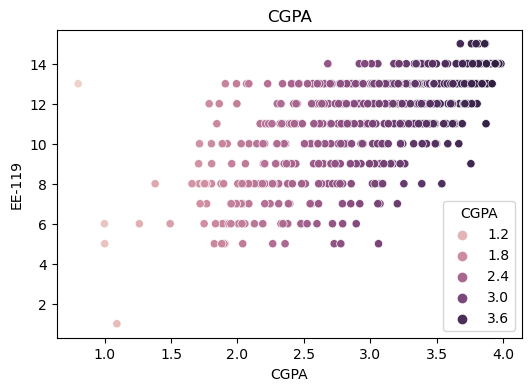

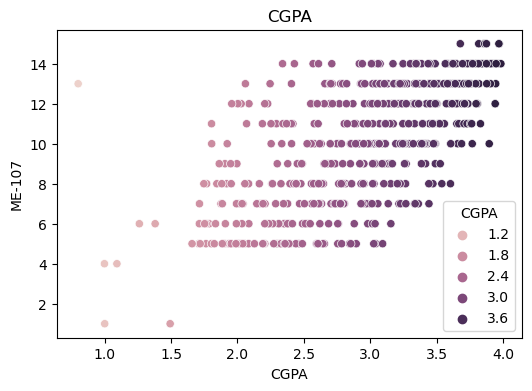

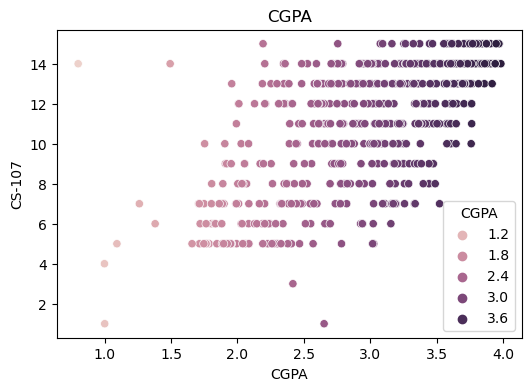

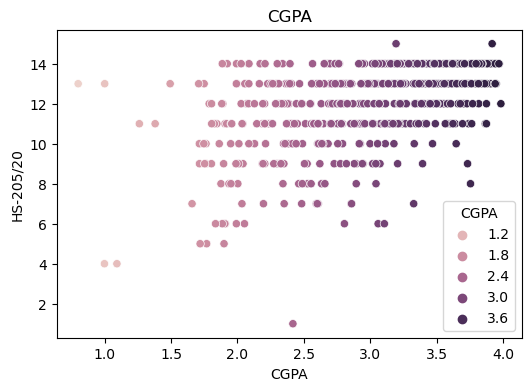

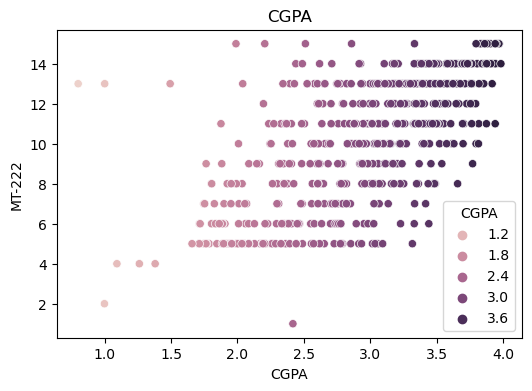

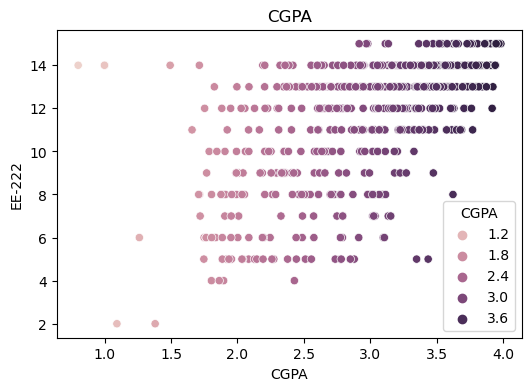

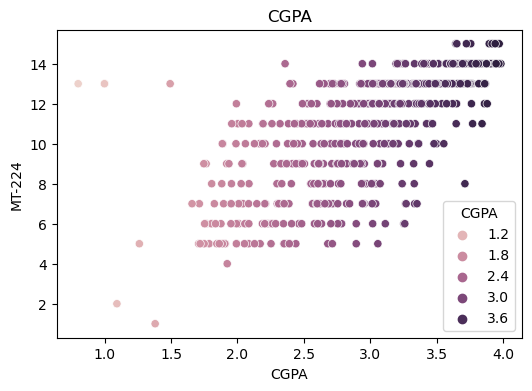

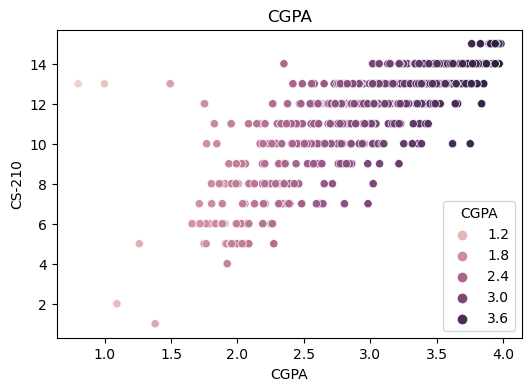

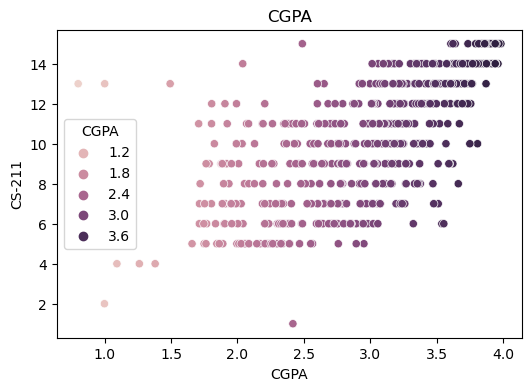

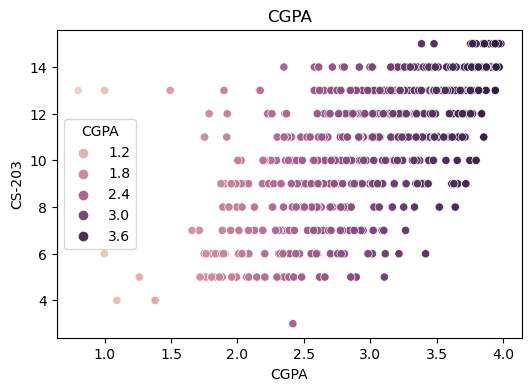

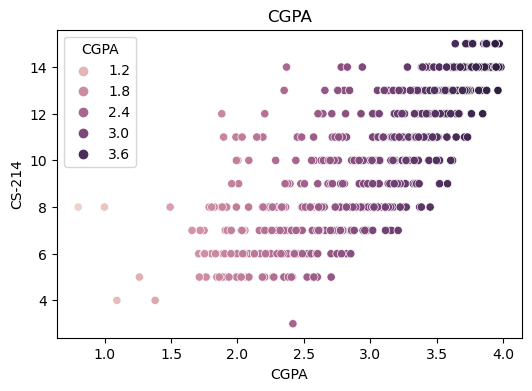

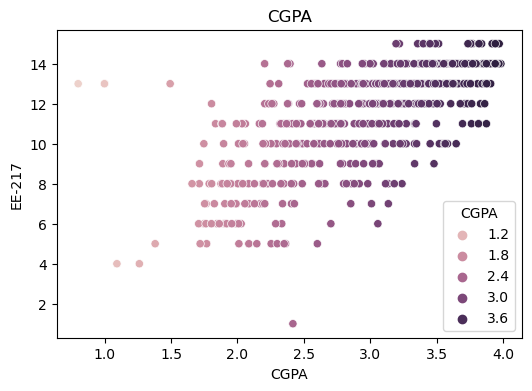

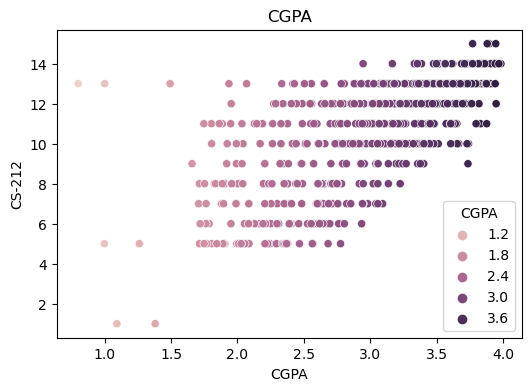

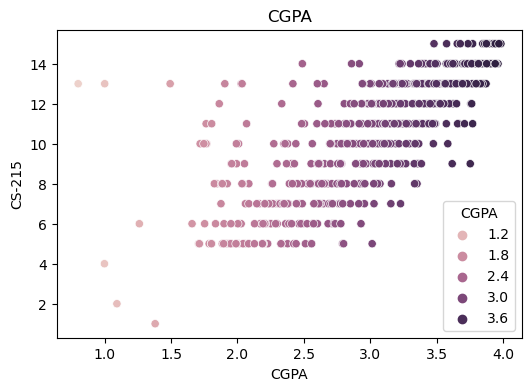

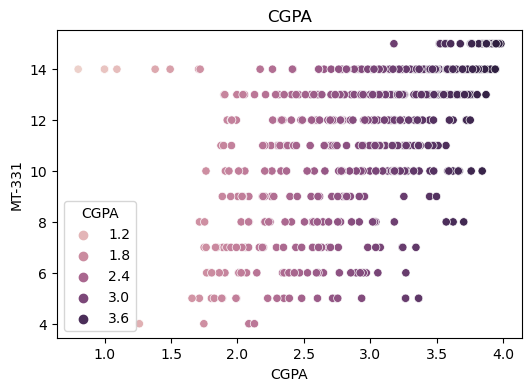

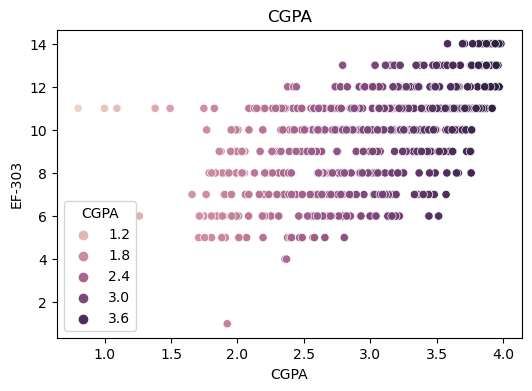

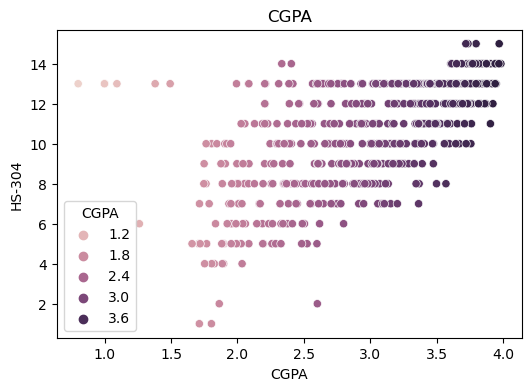

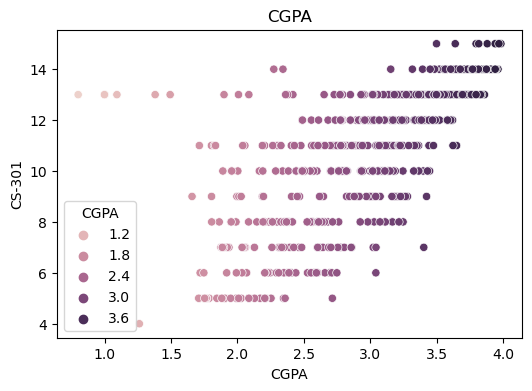

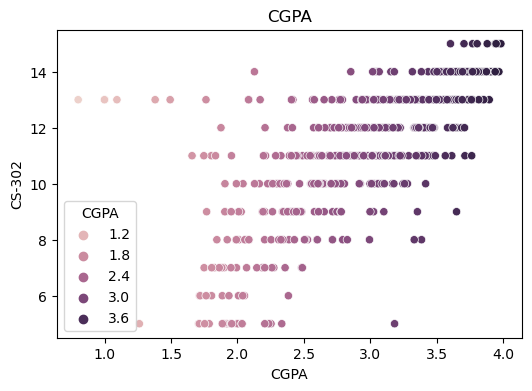

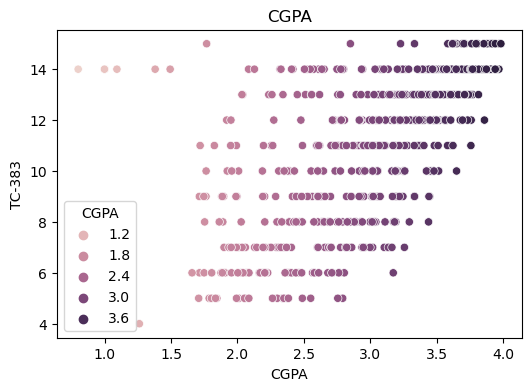

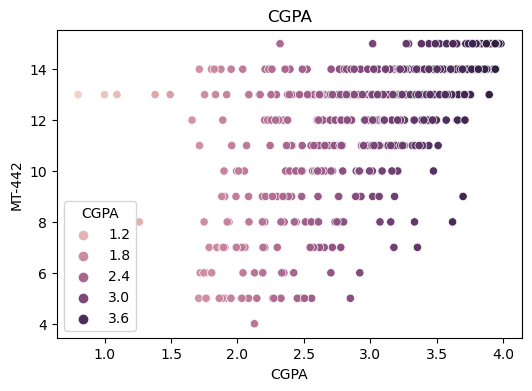

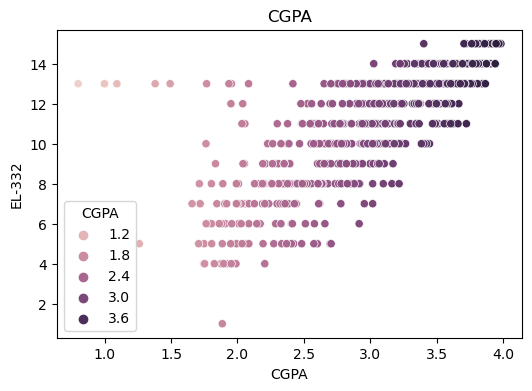

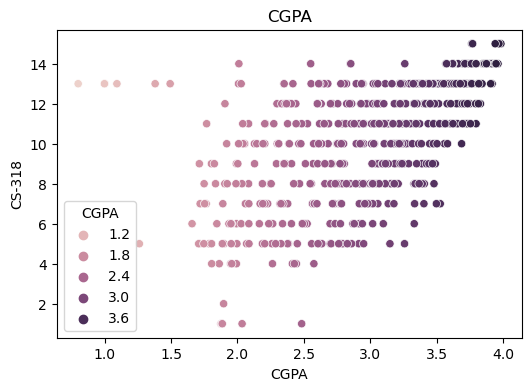

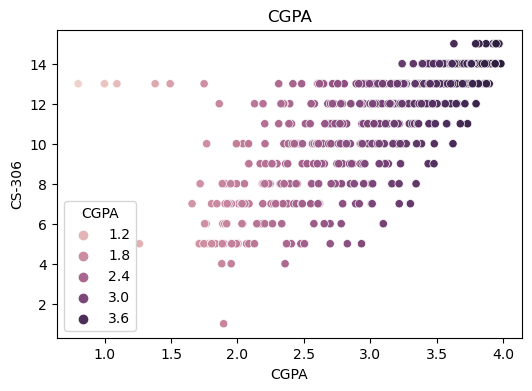

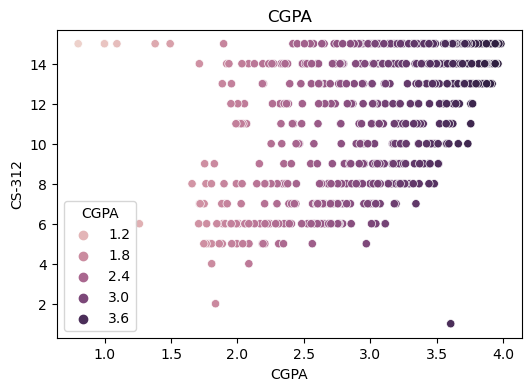

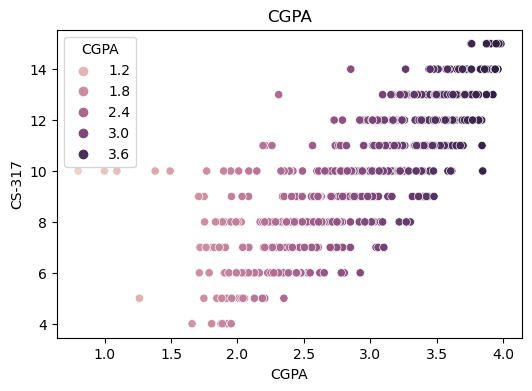

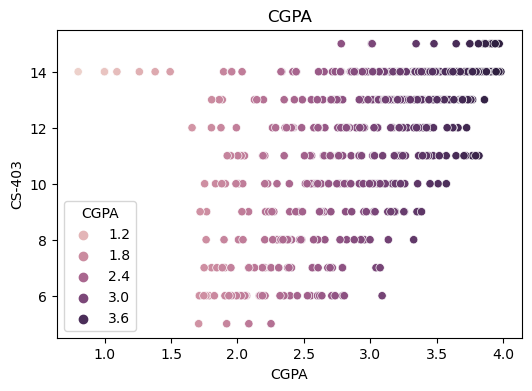

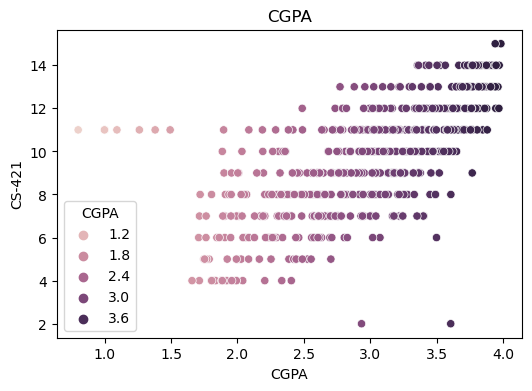

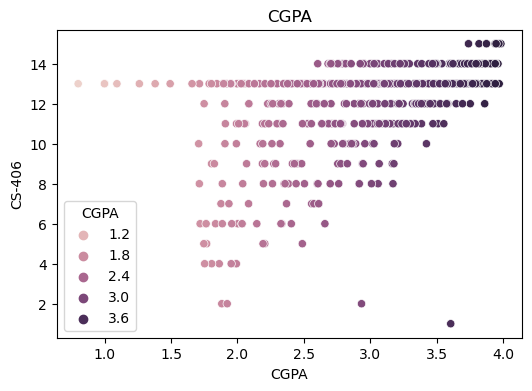

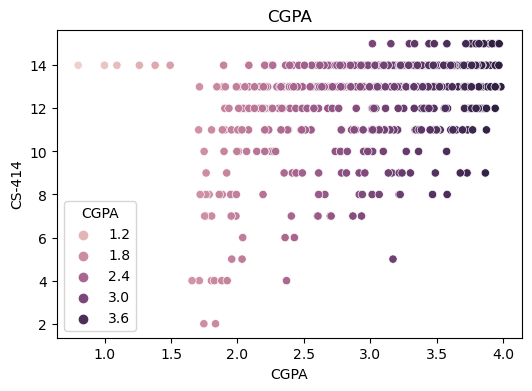

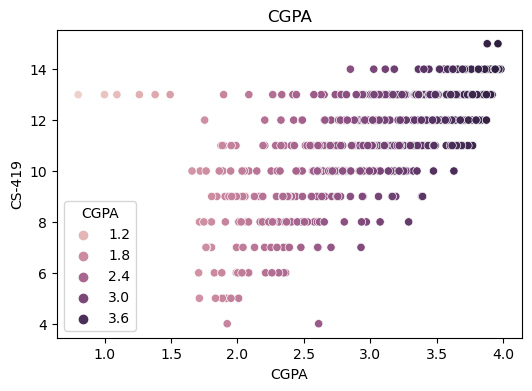

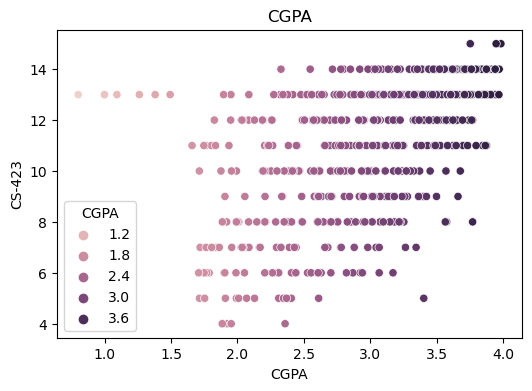

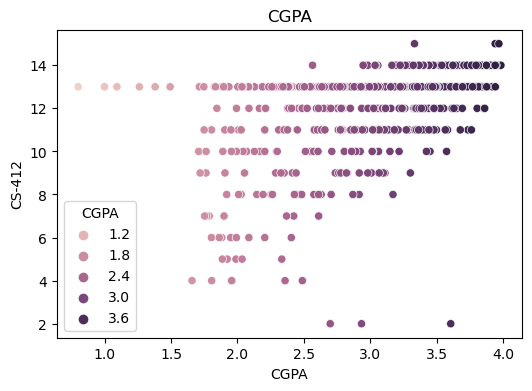

In [31]:
for col in x:
    plt.figure(figsize=(6,4))
    plt.title('CGPA')
    sns.scatterplot(df_grades['CGPA'],df_grades[col],hue=df_grades['CGPA'])
    plt.show()

From above graphs we can observe that majority are getting high CGPA with getting high grades.

#### Correlation Matrix using HeatMap

<AxesSubplot:>

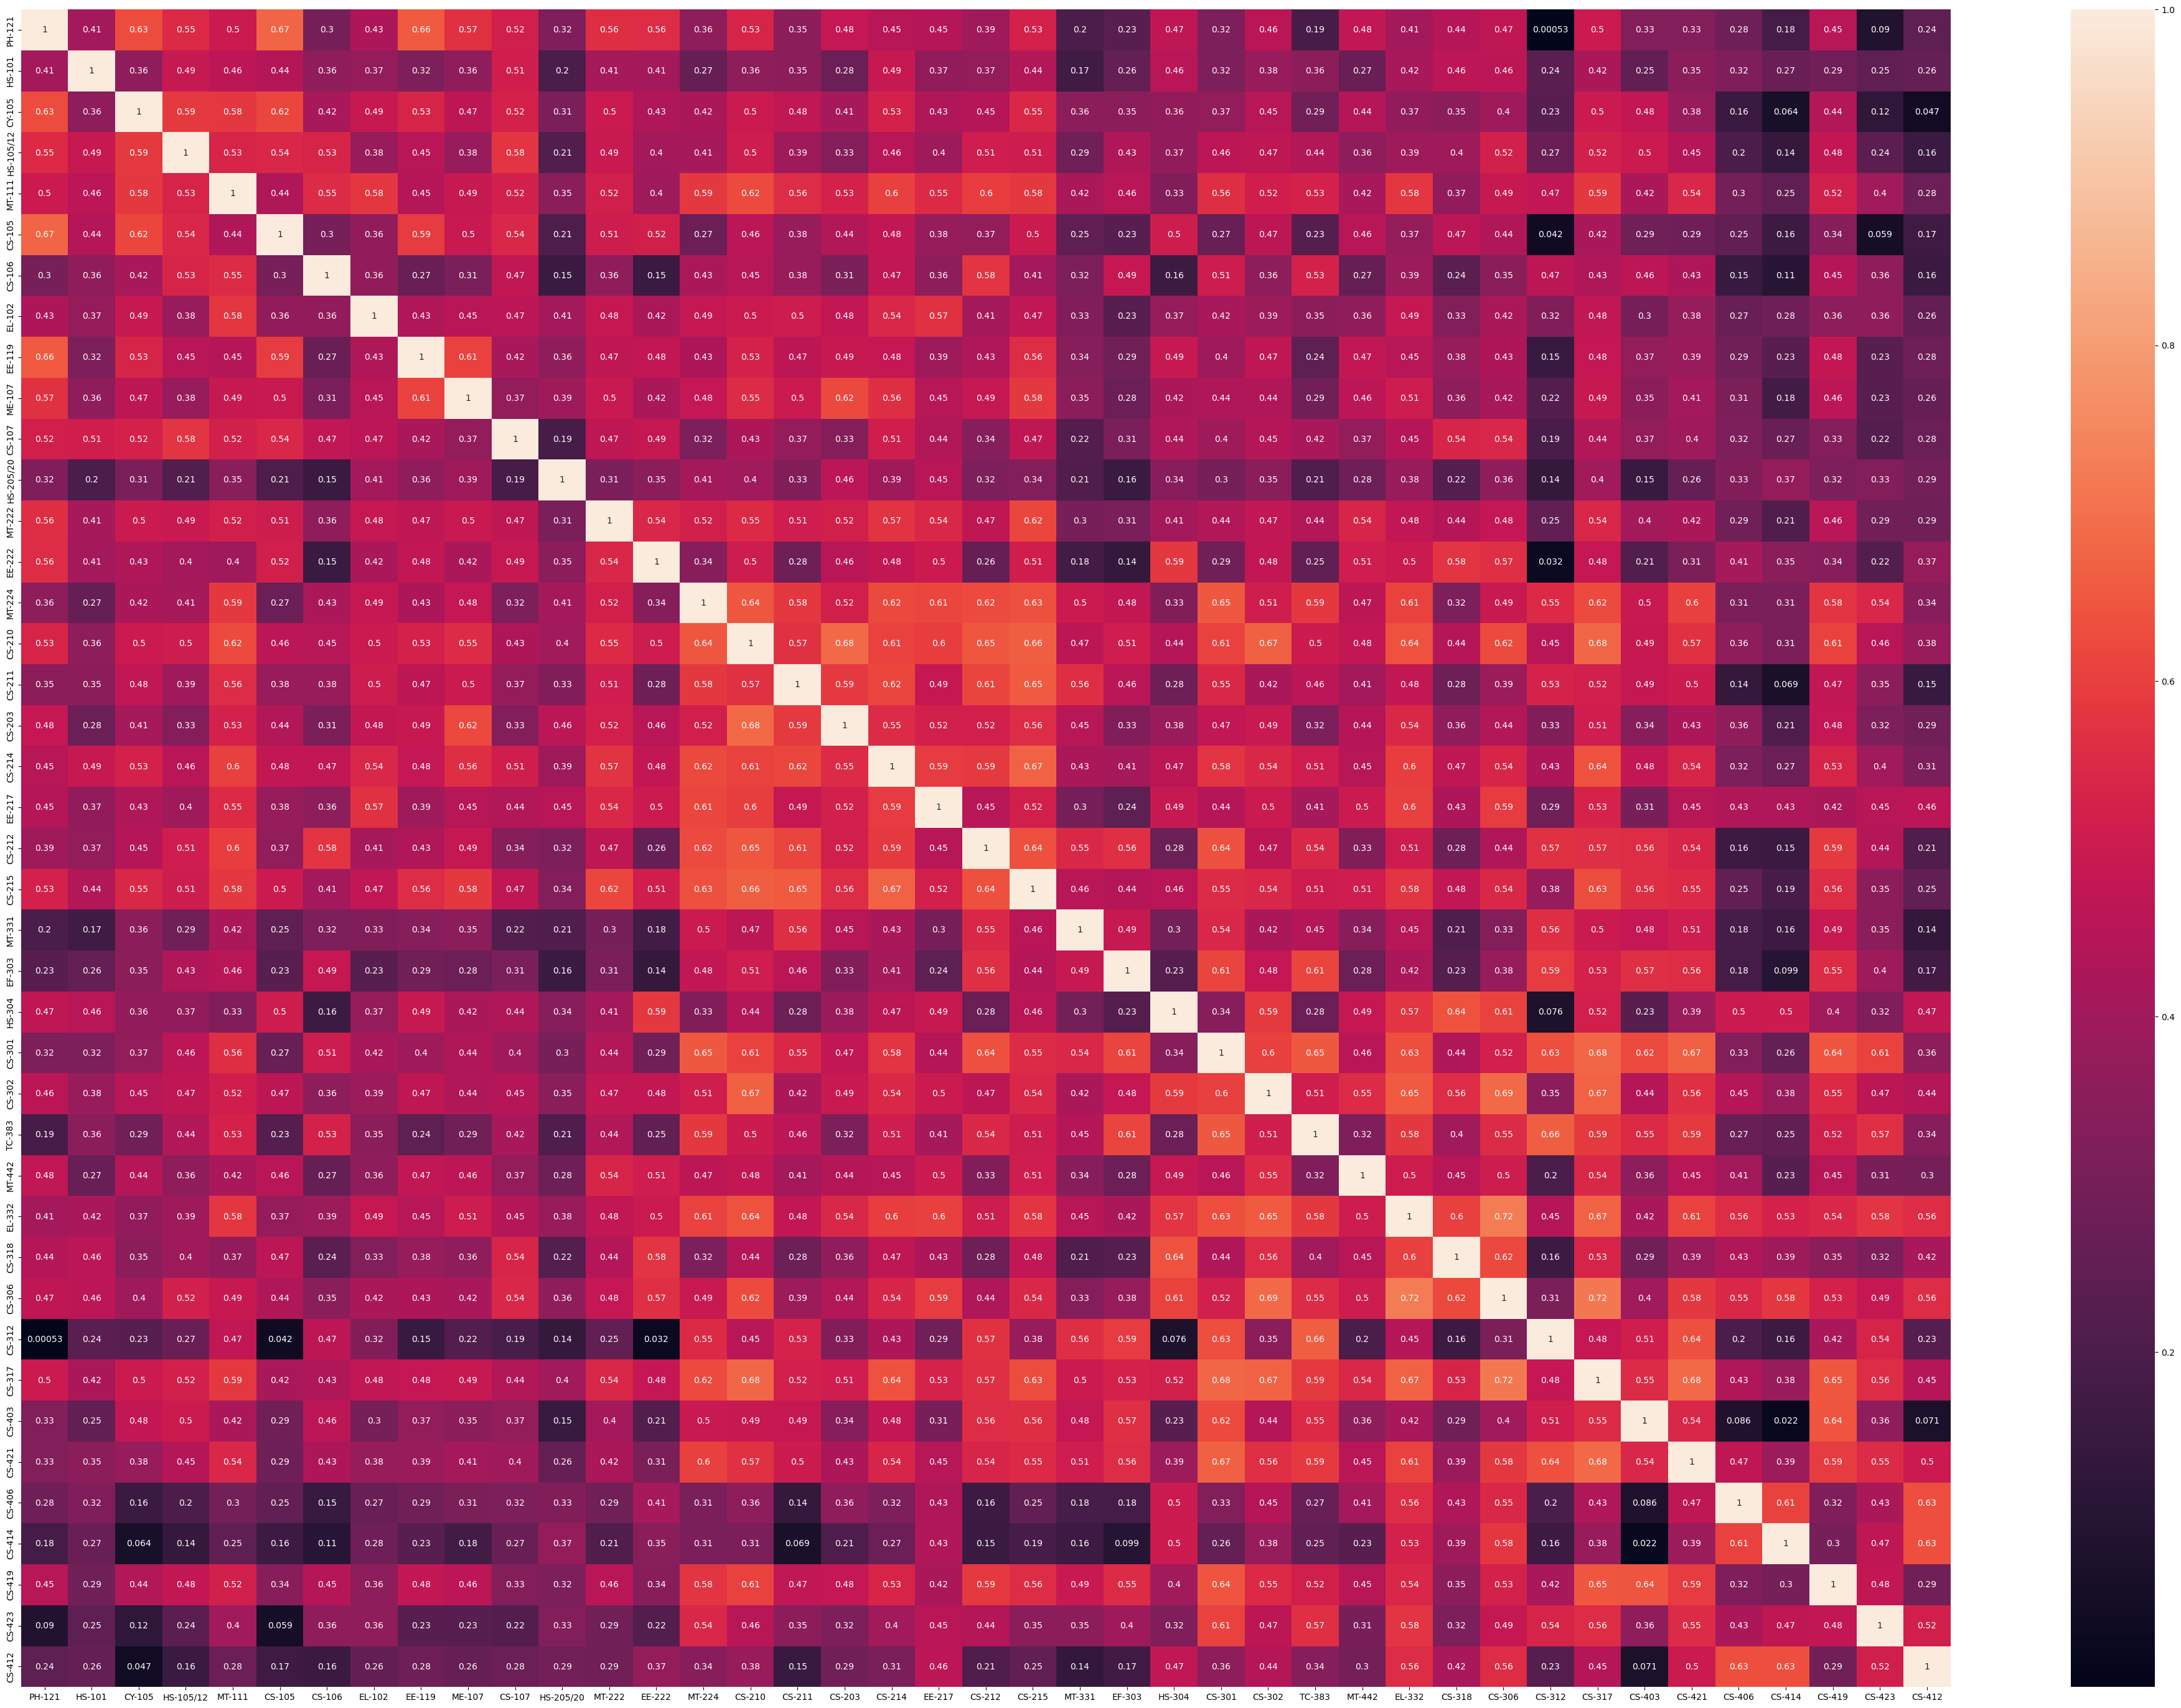

In [33]:
plt.figure(figsize=(50,35))
sns.heatmap(x.corr(),annot=True)

#### Scaling input data using Standard Scaler

In [34]:
sc = StandardScaler()
x_scaled=sc.fit_transform(x)

#### Splitting the data into Train and Test Set.

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

Here using the 80% data for the training set and 20% data for the testing set.

### Model Building(Regression)

### Linear Regression

In [40]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [41]:
# Model Evaluation
y_pred=model1.predict(x_test)
print('R2 Score(Training Accuracy) :'+ str(round(model1.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model1.score(x_test, y_test)*100))+'%')
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :93%
R2 score(Testing Accuracy) :98%
MAE(Mean absolute Error) : 0.06
MSE(Mean Squared Error) : 0.01
RMSE(Root Mean squared Error) : 0.25


### Decision Tree Regressor

In [38]:
model2 = DecisionTreeRegressor()
model2.fit(x_train, y_train)

DecisionTreeRegressor()

In [39]:
# Model Evaluation
y_pred=model2.predict(x_test)
print('R2 Score(Training Accuracy) :'+ str(round(model2.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model2.score(x_test, y_test)*100))+'%')
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :100%
R2 score(Testing Accuracy) :83%
MAE(Mean absolute Error) : 0.18
MSE(Mean Squared Error) : 0.06
RMSE(Root Mean squared Error) : 0.43


### Random Forest Regressor

In [42]:
model3 = RandomForestRegressor()
model3.fit(x_train, y_train)

RandomForestRegressor()

In [43]:
# Model Evaluation
y_pred=model3.predict(x_test)
print('R2 Score(Training Accuracy) :'+ str(round(model3.score(x_train, y_train)*100))+'%')
print('R2 score(Testing Accuracy) :'+ str(round(model3.score(x_test, y_test)*100))+'%')
print('MAE(Mean absolute Error) : %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE(Mean Squared Error) : %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE(Root Mean squared Error) : %.2f' % np.sqrt(mean_absolute_error(y_test, y_pred))) 

R2 Score(Training Accuracy) :99%
R2 score(Testing Accuracy) :96%
MAE(Mean absolute Error) : 0.08
MSE(Mean Squared Error) : 0.01
RMSE(Root Mean squared Error) : 0.29
